In [1]:
import pandas as pd
import configparser
import lib.Tools as tools
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
config = configparser.ConfigParser()
config.read('./lib/application.config')

['./lib/application.config']

In [3]:
key = config['finnhub']['key']
resolution = config['question2']['resolution']
symbol = config['question2']['symbol']
start_time = config['question2']['start_time']
end_time = config['question2']['end_time']

In [4]:
start = tools.date_to_epoch(start_time)
end = tools.date_to_epoch(end_time)

In [5]:
res = tools.getStockCandles(key, symbol, resolution, start, end)
res.pop('s', None)
df = pd.DataFrame(res)

In [6]:
# Insert Date column in df
df.insert(0, "Date", "")
# convert epotch time to datetime stamp in Date column
df['Date'] = pd.to_datetime(df['t'], unit='s')
df.insert(7, "daily_return", float, allow_duplicates=True)


In [7]:
df1 = tools.cal_DailyReturn(df)
#print(df1)

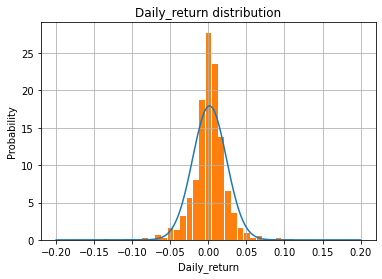

In [8]:
mean = df1['daily_return'].mean()
std  = df1['daily_return'].std()

x = np.arange(-0.2, 0.2, 0.0001)
y = tools.normfun(x, mean, std)
plt.plot(x,y)

plt.hist(df1['daily_return'], bins = 30, rwidth=0.9, density=True)
plt.title("Daily_return distribution")
plt.xlabel("Daily_return")
plt.ylabel("Probability")
plt.grid()


In [9]:
# run normal test 
stat , p = stats.normaltest(df1['daily_return'])

In [10]:
if p < 0.05:
    print("The daily return is NOT normal")
if p > 0.05:
    print("The daily return is Normal")

The daily return is NOT normal


In [11]:
# run shapiro test
stat, p = stats.shapiro(df1['daily_return'])

In [12]:
if p<0.05:
    print("Shapiro test indicates the daily return is NOT normal")
if p>0.05:
    print("Shapiro test indicates the daily return is normal")

Shapiro test indicates the daily return is NOT normal
